In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

In [ ]:
print("[INFO]  loading MNIST full dataset...")
opt = keras.optimizers.Adam(learning_rate=0.01)

dataset = fetch_openml('mnist_784')
data = dataset.data.astype("float") / 255.0

(trainX, testX, trainY, testY) = train_test_split(data, dataset.target, test_size=0.25)

[INFO]  loading MNIST full dataset...


In [ ]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [ ]:
model = Sequential()

model.add(Dense(256, input_shape=(784,), activation="sigmoid"))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

In [ ]:
print("[INFO] training network..")
epochs = 100

model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=epochs, batch_size=128)

[INFO] training network..
Epoch 1/100
411/411 [==============================] - 3s 7ms/step - loss: 0.3639 - accuracy: 0.8938 - val_loss: 0.1884 - val_accuracy: 0.9434
Epoch 2/100
411/411 [==============================] - 2s 6ms/step - loss: 0.1451 - accuracy: 0.9568 - val_loss: 0.1598 - val_accuracy: 0.9523
Epoch 3/100
411/411 [==============================] - 2s 5ms/step - loss: 0.1046 - accuracy: 0.9685 - val_loss: 0.1215 - val_accuracy: 0.9642
Epoch 4/100
411/411 [==============================] - 2s 5ms/step - loss: 0.0826 - accuracy: 0.9751 - val_loss: 0.1165 - val_accuracy: 0.9671
Epoch 5/100
411/411 [==============================] - 2s 5ms/step - loss: 0.0685 - accuracy: 0.9783 - val_loss: 0.1161 - val_accuracy: 0.9667
Epoch 6/100
411/411 [==============================] - 2s 5ms/step - loss: 0.0602 - accuracy: 0.9811 - val_loss: 0.1155 - val_accuracy: 0.9672
Epoch 7/100
411/411 [==============================] - 2s 6ms/step - loss: 0.0522 - accuracy: 0.9838 - val_loss: 0.1

In [ ]:
print("[INFO] evaluating network...")

predictions = model.predict(testX, batch_size=128)

print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names = [str(x) for x in lb.classes_]))

[INFO] evaluating network...
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1702
           1       0.99      0.99      0.99      1947
           2       0.97      0.96      0.97      1727
           3       0.97      0.97      0.97      1808
           4       0.98      0.97      0.97      1731
           5       0.97      0.96      0.96      1546
           6       0.98      0.98      0.98      1687
           7       0.98      0.97      0.98      1866
           8       0.96      0.97      0.96      1740
           9       0.95      0.97      0.96      1746

    accuracy                           0.97     17500
   macro avg       0.97      0.97      0.97     17500
weighted avg       0.97      0.97      0.97     17500



In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


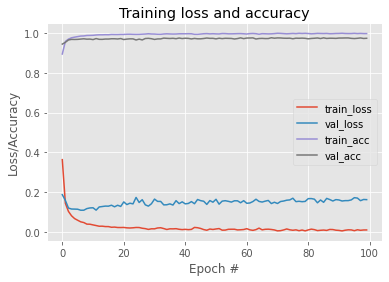

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
plt.title("Training loss and accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('/content/drive/MyDrive/DataScience/Pyimagesearch_DeepLearningBook/Chapter10/keras_mnist_output.png')